### Task 2: Linear Dataset

#### Importing libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Loading datasets

In [17]:
df1 = pd.read_csv("../Datasets/LinearDataset/Class1.txt",delimiter=' ', header=None)
df2 = pd.read_csv("../Datasets/LinearDataset/Class2.txt",delimiter=' ', header=None)
df3 = pd.read_csv("../Datasets/LinearDataset/Class3.txt",delimiter=' ', header=None)

#### Dividing training and testing data

In [18]:
df1_train = df1[:int(len(df1)*0.7)]
df1_test = df1[int(len(df1)*0.7):]
df2_train = df2[:int(len(df2)*0.7)]
df2_test = df2[int(len(df2)*0.7):]
df3_train = df3[:int(len(df3)*0.7)]
df3_test = df3[int(len(df3)*0.7):]

#### KNN model

(1050, 2)
(450, 2)
Bayes Classifier Results:
Accuracy: 0.9977777777777778
Precision: [1.         0.99337748 1.        ]
Recall: [1.         1.         0.99333333]
F-measure: [1.         0.99667774 0.99665552]
Confusion Matrix for Bayes Classifier:
[[150   0   0]
 [  0 150   0]
 [  0   1 149]]


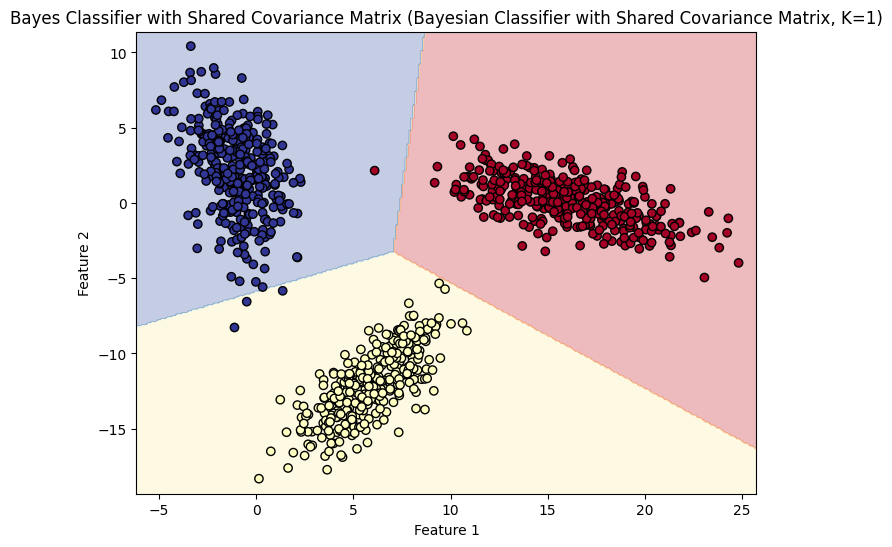

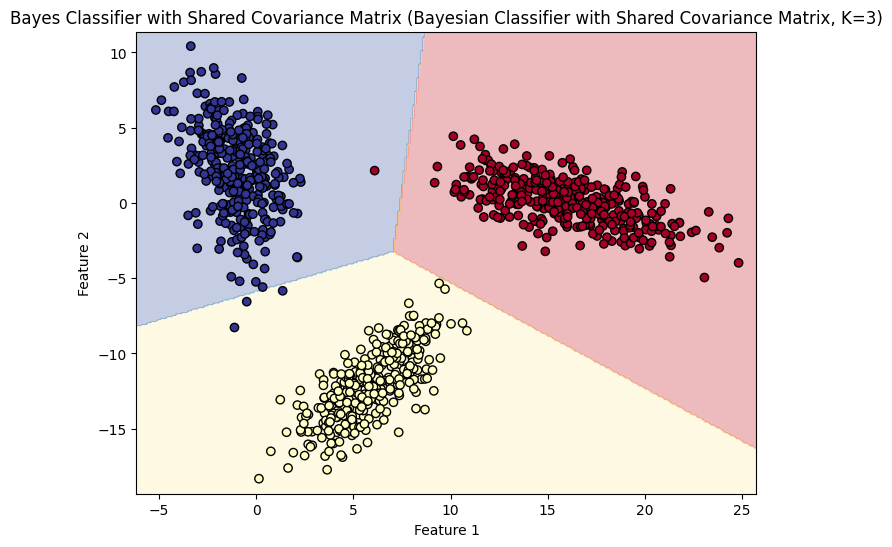

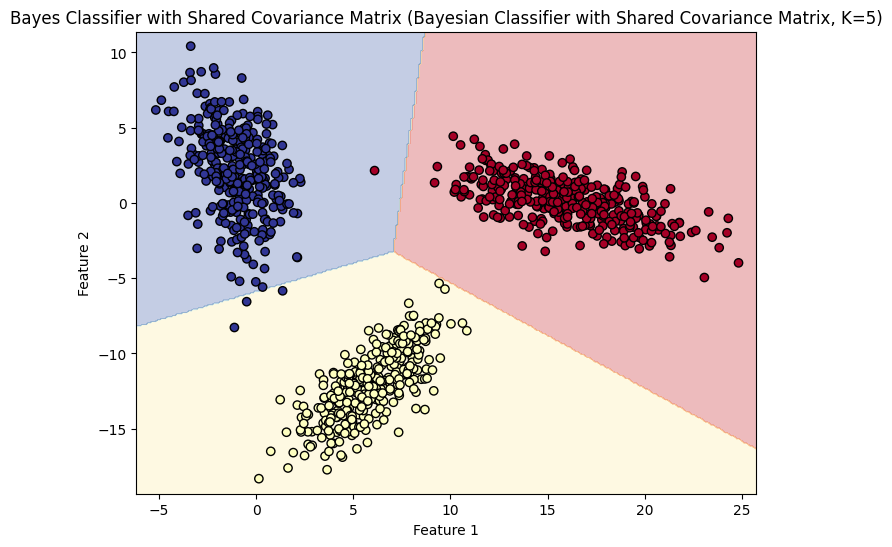

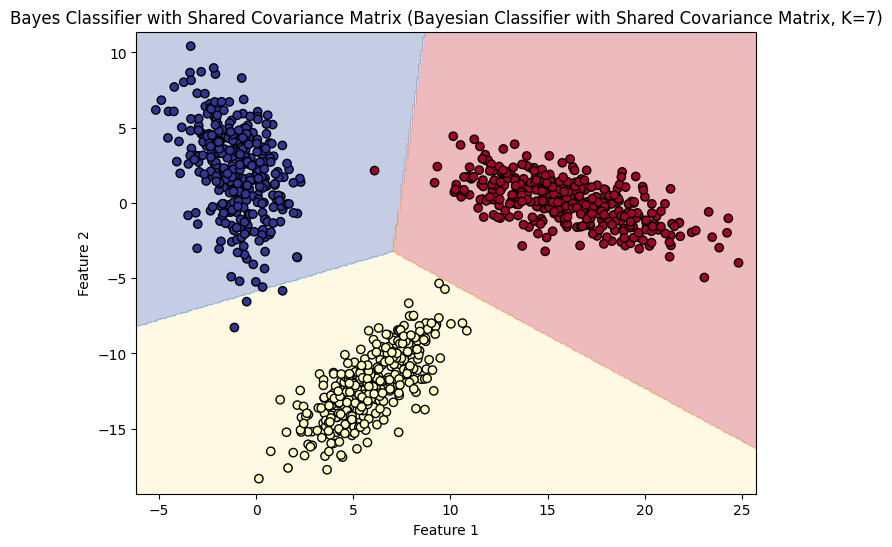

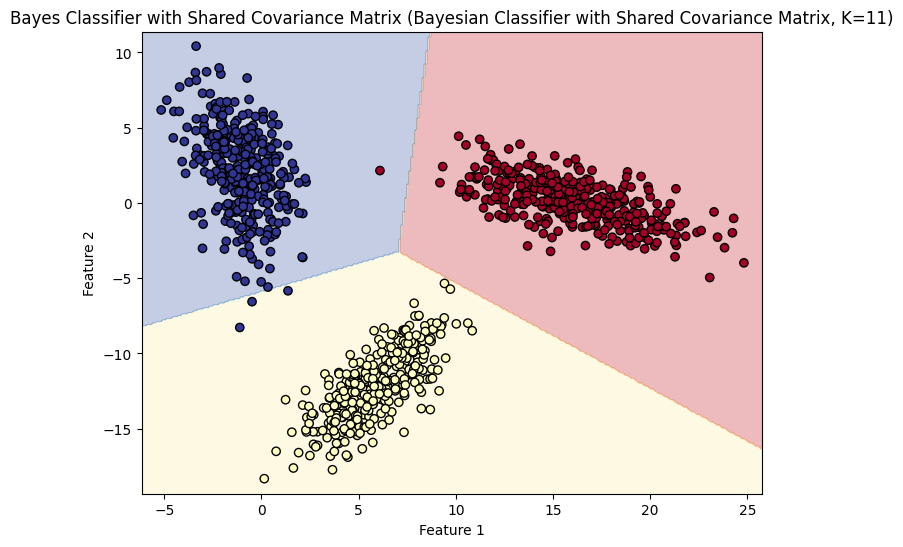

In [19]:
# Function to estimate density assuming Gaussian distribution with shared covariance matrix
def gaussian_density(X, mean, covariance):
    # Use the multivariate Gaussian distribution formula
    dim = X.shape[1]
    covariance_inv = np.linalg.inv(covariance)
    covariance_det = np.linalg.det(covariance)
    constant = 1 / (np.sqrt((2 * np.pi) ** dim * covariance_det))
    
    diff = X - mean
    exponent = -0.5 * np.sum(np.dot(diff, covariance_inv) * diff, axis=1)
    
    return constant * np.exp(exponent)

# Function to calculate the prior probabilities of each class
def calculate_prior_probabilities(y_train, classes):
    priors = []
    total_samples = len(y_train)
    for cls in classes:
        priors.append(np.sum(y_train == cls) / total_samples)
    return np.array(priors)

# Function to estimate the shared covariance matrix for all classes
def estimate_shared_covariance(X_train):
    # Calculate the covariance matrix for the entire dataset
    covariance_matrix = np.cov(X_train.T)
    return covariance_matrix

# Function to apply Bayes' Theorem for classification with shared covariance matrix
def bayesian_classifier(X_train, y_train, X_test):
    classes = np.unique(y_train)
    
    # Calculate prior probabilities
    priors = calculate_prior_probabilities(y_train, classes)

    # Estimate shared covariance matrix across all classes
    shared_covariance = estimate_shared_covariance(X_train)

    # Calculate the mean for each class
    means = np.array([X_train[y_train == cls].mean(axis=0) for cls in classes])

    # Estimate density for each class
    densities = np.zeros((X_test.shape[0], len(classes)))
    for i, cls in enumerate(classes):
        densities[:, i] = gaussian_density(X_test, means[i], shared_covariance)

    # Compute the posterior probability for each class (Bayes' Theorem)
    posteriors = densities * priors  # Multiply by prior
    predicted_classes = np.argmax(posteriors, axis=1)  # Choose class with the highest posterior

    return predicted_classes, posteriors

# Function to plot decision boundaries for different values of k
def plot_decision_boundary(X_train, y_train, clf, title, k_values):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Generate plots for each value of k
    for k in k_values:
        Z, _ = clf(X_train, y_train, np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
        plt.title(f"{title} (Bayesian Classifier with Shared Covariance Matrix, K={k})")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

# Prepare data: concatenate all classes (df1_train, df2_train, df3_train)
X_train = pd.concat([df1_train, df2_train, df3_train], ignore_index=True)
y_train = np.concatenate([np.zeros(len(df1_train)), np.ones(len(df2_train)), np.ones(len(df3_train))*2])

X_test = pd.concat([df1_test, df2_test, df3_test], ignore_index=True)
y_test = np.concatenate([np.zeros(len(df1_test)), np.ones(len(df2_test)), np.ones(len(df3_test))*2])

# Ensure X_train and X_test are 2D arrays
print(X_train.shape)  # Should print (n_samples, n_features)
print(X_test.shape)   # Should print (n_samples, n_features)

# Build the Bayes classifier using Gaussian distribution with shared covariance
y_pred_bayes, _ = bayesian_classifier(X_train, y_train, X_test)

# Calculate classification metrics for Bayes classifier
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
precision_bayes = precision_score(y_test, y_pred_bayes, average=None, labels=[0, 1, 2])
recall_bayes = recall_score(y_test, y_pred_bayes, average=None, labels=[0, 1, 2])
f_measure_bayes = f1_score(y_test, y_pred_bayes, average=None, labels=[0, 1, 2])

# Print metrics for the Bayes classifier
print(f"Bayes Classifier Results:")
print(f"Accuracy: {accuracy_bayes}")
print(f"Precision: {precision_bayes}")
print(f"Recall: {recall_bayes}")
print(f"F-measure: {f_measure_bayes}")

# Confusion matrix for the Bayes classifier
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
print(f"Confusion Matrix for Bayes Classifier:\n{cm_bayes}")

# Plot decision boundaries for the Bayes classifier with multiple k values
k_values = [1, 3, 5, 7, 11]
plot_decision_boundary(X_train.to_numpy(), y_train, bayesian_classifier, "Bayes Classifier with Shared Covariance Matrix", k_values)
